### 数据透视

经过前面的学习，我们已经将数据准备就绪而且变成了我们想要的样子，接下来就是最为重要的数据透视阶段了。当我们拿到一大堆数据的时候，`如何从数据中迅速的解读出有价值的信息，把繁杂的数据变成容易解读的统计图表并再此基础上产生业务洞察`，这就是数据分析要解决的核心问题。

In [26]:
import numpy as np
import pandas as pd

scores = np.random.randint(50, 101, (5, 3))
names = ("关羽", "张飞", "赵云", "马超", "黄忠")
courses = ("语文", "数学", "英语")
df = pd.DataFrame(data=scores, columns=courses, index=names)
print(df)

    语文  数学  英语
关羽  56  55  69
张飞  57  51  68
赵云  58  98  98
马超  68  94  52
黄忠  78  82  75


计算每门课程成绩的平均分。

In [27]:
print(df.mean())

语文    63.4
数学    76.0
英语    72.4
dtype: float64


计算每个学生成绩的平均分。

In [28]:
print(df.mean(axis=1))

关羽    60.000000
张飞    58.666667
赵云    84.666667
马超    71.333333
黄忠    78.333333
dtype: float64


计算每门课程成绩的方差。

In [29]:
print(df.var())

语文     89.8
数学    477.5
英语    277.3
dtype: float64


获取每门课程的描述性统计信息。

In [30]:
print(df.describe())

              语文         数学         英语
count   5.000000   5.000000   5.000000
mean   63.400000  76.000000  72.400000
std     9.476286  21.851773  16.652327
min    56.000000  51.000000  52.000000
25%    57.000000  55.000000  68.000000
50%    58.000000  82.000000  69.000000
75%    68.000000  94.000000  75.000000
max    78.000000  98.000000  98.000000


### 排序和取头部值
如果需要对数据进行排序，可以使用`DataFrame`对象的`sort_values`方法，该方法的`by`参数可以指定根据哪个列或哪些列进行排序，而`ascending`参数可以指定升序或是降序。例如，下面的代码展示了如何将学生表按语文成绩排降序。

In [31]:
print(df.sort_values(by="数学", ascending=True))
print(
    df.sort_index(axis=1)
)  # axis为0时，按行排序，也就是按照行索引进行排序，这里是关羽，张飞。。。；axis为1时，按列排序，也就是按照列进行排序，这里就是数学，英语，语文。。。（字母顺序）

    语文  数学  英语
张飞  57  51  68
关羽  56  55  69
黄忠  78  82  75
马超  68  94  52
赵云  58  98  98
    数学  英语  语文
关羽  55  69  56
张飞  51  68  57
赵云  98  98  58
马超  94  52  68
黄忠  82  75  78


In [32]:
print(df.nlargest(2, "数学"))
print(df.nsmallest(2, "英语"))

    语文  数学  英语
赵云  58  98  98
马超  68  94  52
    语文  数学  英语
马超  68  94  52
张飞  57  51  68


#### 分组聚合

我们先从之前使用过的 Excel 文件中读取2020年销售数据，然后再为大家演示如何进行分组聚合操作。

In [33]:
df = pd.read_excel("./2020年销售数据.xlsx")
print(df.head())

        销售日期 销售区域 销售渠道        销售订单   品牌   售价  销售数量
0 2020-01-01   上海  拼多多  182894-455  八匹马   99    83
1 2020-01-01   上海   抖音  205635-402  八匹马  219    29
2 2020-01-01   上海   天猫  205654-021  八匹马  169    85
3 2020-01-01   上海   天猫  205654-519  八匹马  169    14
4 2020-01-01   上海   天猫  377781-010  皮皮虾  249    61


In [34]:
df["销售额"] = df["销售数量"] * df["售价"]
print(df.head())

        销售日期 销售区域 销售渠道        销售订单   品牌   售价  销售数量    销售额
0 2020-01-01   上海  拼多多  182894-455  八匹马   99    83   8217
1 2020-01-01   上海   抖音  205635-402  八匹马  219    29   6351
2 2020-01-01   上海   天猫  205654-021  八匹马  169    85  14365
3 2020-01-01   上海   天猫  205654-519  八匹马  169    14   2366
4 2020-01-01   上海   天猫  377781-010  皮皮虾  249    61  15189


In [35]:
print(df.groupby("销售区域")["销售额"].sum())
for name, group in df.groupby("销售区域"):
    print("组名:", name)
    print()
    print(group)

销售区域
上海    11610489
北京    12477717
安徽      895463
广东     1617949
江苏     2304380
浙江      687862
福建    10178227
Name: 销售额, dtype: int64
组名: 上海

           销售日期 销售区域 销售渠道        销售订单    品牌   售价  销售数量    销售额
0    2020-01-01   上海  拼多多  182894-455   八匹马   99    83   8217
1    2020-01-01   上海   抖音  205635-402   八匹马  219    29   6351
2    2020-01-01   上海   天猫  205654-021   八匹马  169    85  14365
3    2020-01-01   上海   天猫  205654-519   八匹马  169    14   2366
4    2020-01-01   上海   天猫  377781-010   皮皮虾  249    61  15189
...         ...  ...  ...         ...   ...  ...   ...    ...
1928 2020-12-26   上海  拼多多  211931-461   八匹马  139    10   1390
1929 2020-12-27   上海   京东   AUBJ002-1    壁虎  159    49   7791
1930 2020-12-27   上海   实体      D81411  花花姑娘  169    42   7098
1936 2020-12-28   上海  拼多多      D89467  花花姑娘  499    31  15469
1937 2020-12-28   上海   抖音      D89470  花花姑娘  499    94  46906

[563 rows x 8 columns]
组名: 北京

           销售日期 销售区域 销售渠道            销售订单    品牌   售价  销售数量    销售额
19   2020-01-04 

### 我看到groupby返回的是一个DataFrameGroupBy对象，我用for循环输出它的时候，发现可以分为两部分，一个是name，一个是group，所以它是类似于一个字典那样吗？键值对应的那种感觉，只不过这里的值是一个DataFrame
#### 是的，理解正确！
`DataFrameGroupBy` 对象确实类似字典结构：
- 键(name)：分组依据的值（如 "华北"、"华东"）
- 值(group)：对应的 DataFrame（包含该组所有行数据）

类比理解
```python
# 类似于这样的字典结构（概念上）
{
    "华北": DataFrame(...),  # 华北区域的所有销售记录
    "华东": DataFrame(...),  # 华东区域的所有销售记录
    "华南": DataFrame(...)   # 华南区域的所有销售记录
}
```
实际访问方式
- `grouped.groups` 可以看到类似字典的键值映射
- `grouped.get_group("华北")` 就像字典的 dict["华北"]
- `for name, group in grouped` 就像字典的 `for key, value in dict.items()

所以你的理解完全正确：GroupBy 对象本质上是一个特殊的类字典结构，键是分组值，值是对应的` DataFrame。

如果我们要统计每个月的销售总额，我们可以将“销售日期”作为groupby`方法的参数，当然这里需要先将“销售日期”处理成月，代码和结果如下所示。

In [36]:
print("每个月的销售总额:")
print(df.groupby(df["销售日期"].dt.month)["销售额"].sum())

每个月的销售总额:
销售日期
1     5409855
2     4608455
3     4164972
4     3996770
5     3239005
6     2817936
7     3501304
8     2948189
9     2632960
10    2375385
11    2385283
12    1691973
Name: 销售额, dtype: int64


接下来我们将难度升级，统计每个销售区域每个月的销售总额，这又该如何处理呢？事实上，`groupby`方法的第一个参数可以是一个列表，列表中可以指定多个分组的依据，大家看看下面的代码和输出结果就明白了。

In [37]:
print("每个销售区域每个月的销售总额")
print(df.groupby(["销售区域", df["销售日期"].dt.month])["销售额"].sum())

每个销售区域每个月的销售总额
销售区域  销售日期
上海    1       1679125
      2       1689527
      3       1061193
      4       1082187
      5        841199
      6        785404
      7        863906
      8        734937
      9       1107693
      10       412108
      11       825169
      12       528041
北京    1       1878234
      2       1807787
      3       1360666
      4       1205989
      5        807300
      6       1216432
      7       1219083
      8        645727
      9        390077
      10       671608
      11       678668
      12       596146
安徽    4        341308
      5        554155
广东    3        388180
      8        469390
      9        365191
      11       395188
江苏    4        537079
      7        841032
      10       710962
      12       215307
浙江    3        248354
      8        439508
福建    1       1852496
      2       1111141
      3       1106579
      4        830207
      5       1036351
      6        816100
      7        577283
      8        658627
      

In [38]:
# 为了理解 groupby 的执行过程，我们创建一个简化的例子

# 1. 创建简化的数据
import pandas as pd
import numpy as np

print("原始数据:")
print(df)
print("\n" + "=" * 50 + "\n")

# 2. 添加月份列，方便理解
df["月份"] = df["销售日期"].dt.month
print("添加月份列后:")
print(df)
print("\n" + "=" * 50 + "\n")

# 3. 展示分组过程
print("第一步：按 [销售区域, 月份] 分组")
grouped = df.groupby(["销售区域", "月份"])

print("分组的键值对:")
for (name, month), group in grouped:
    print(f"组名: {name},{month}")
    """
    ⚠️为什么这里一定要用两个方括号？
    group[['销售区域', '月份', '销售额']] ✅ 正确 - 外层方括号表示索引操作，内层方括号表示列名列表
    group['销售区域', '月份', '销售额'] ❌ 错误 - 这相当于传入一个元组作为键，pandas 会尝试查找名为 ('销售区域', '月份', '销售额') 的单个列
    """
    print(
        f"数据:\n{group[['销售区域', '月份', '销售额']]}"
    )  # 可以试着只输出group，你会看到完整的一组，包含所有列的， 这里只显示出了几列而已
    print(
        f"该组销售额总和: {group['销售额'].sum()}"  # group['销售额']表示取出“销售额”这一列
    )  # 只需这一行就可以对该列所有的元素进行求和，这就是一种向量化的操作
    print("-" * 30)

print("\n" + "=" * 50 + "\n")

# 4. 最终结果
print("最终聚合结果:")
result = df.groupby(["销售区域", "月份"])["销售额"].sum()
print("result: \n", result)

原始数据:
           销售日期 销售区域 销售渠道            销售订单    品牌   售价  销售数量    销售额
0    2020-01-01   上海  拼多多      182894-455   八匹马   99    83   8217
1    2020-01-01   上海   抖音      205635-402   八匹马  219    29   6351
2    2020-01-01   上海   天猫      205654-021   八匹马  169    85  14365
3    2020-01-01   上海   天猫      205654-519   八匹马  169    14   2366
4    2020-01-01   上海   天猫      377781-010   皮皮虾  249    61  15189
...         ...  ...  ...             ...   ...  ...   ...    ...
1940 2020-12-30   北京   京东          D89677  花花姑娘  269    26   6994
1941 2020-12-30   福建   实体      182719-050   八匹马   79    97   7663
1942 2020-12-31   福建   实体          G70083  花花姑娘  269    55  14795
1943 2020-12-31   福建   抖音  211471-902/704   八匹马   59    59   3481
1944 2020-12-31   福建   天猫      211807-050   八匹马   99    27   2673

[1945 rows x 8 columns]


添加月份列后:
           销售日期 销售区域 销售渠道            销售订单    品牌   售价  销售数量    销售额  月份
0    2020-01-01   上海  拼多多      182894-455   八匹马   99    83   8217   1
1    2020-01-01   上海   抖音  

### 再来捋一下过程：
### 🤔疑问：
1. 首先，grouped = df.groupby(["销售区域", "月份"])
2. 然后循环，for (name, month), group in grouped:，我得在里面的group里面使用group['销售额']才可以得到销售额这一列
3. 那为什么最终聚合结果这里，只需要df.groupby(["销售区域", "月份"])["销售额"]就可以了呢？
#### 关键区别：操作的对象不同
##### 循环方式（手动逐个处理）：
```python
grouped = df.groupby(["销售区域", "月份"])  # DataFrameGroupBy 对象
for (name, month), group in grouped:       # group 是具体的 DataFrame 切片
    group['销售额']                        # 从 DataFrame 中取列
```
直接聚合方式（自动批量处理）：
```python
df.groupby(["销售区域", "月份"])["销售额"]  # SeriesGroupBy 对象（所有组的销售额列集合）
.sum()                                     # 对所有组同时执行求和
```
**本质差异：**
- 循环方式：你手动访问每个 group（单个 DataFrame），需要用 group['销售额'] 取列
- 直接方式：pandas 自动处理所有组，["销售额"] 直接从 GroupBy 对象中选择目标列

简单理解：循环是"一个一个处理"，直接聚合是"批量处理所有组"。pandas 的 GroupBy 机制让你可以跳过手动循环，直接对所有分组执行相同操作。

这就是 pandas 向量化操作的威力！

### 🤔继续疑问
但是通过循环我们也可以看到，就像dict的.item()一样，grouped解包出了好几个数据， (name, month), group，为什么直接df.groupby(["销售区域", "月份"])["销售额"]就能获取到所有的销售额列呢？

#### 因为 GroupBy 对象内部维护了分组映射关系
**循环时的解包：**
- grouped 内部已经完成了分组，存储了每个组的索引位置
- 循环只是逐个访问这些已分好的组
- (name, month), group 是迭代器模式，一次只给你一个组

**直接索引时：**
- grouped["销售额"] 是批量操作，pandas 知道所有分组的位置
- 它会同时从每个组中提取销售额列
- 返回的是包含所有组销售额数据的 SeriesGroupBy 对象

**类比理解：**
就像一个文件夹里有多个子文件夹：
- 循环：for folder in folders → 一个一个打开文件夹
- 直接索引：folders.get_all_files("销售额.txt") → 同时从所有文件夹中提取同名文件

关键：GroupBy 对象本身就是一个"分组容器"，它知道每个数据属于哪个组，所以可以同时操作所有组的相同列。

## 总结✍️
### 也就是说，我不用关心销售额属于哪一组，我只要像df.groupby(["销售区域", "月份"])这样分组，然后df.groupby(["销售区域", "月份"])["销售额"]pandas就能自动帮我取到所有子group中含有销售额的列是吗？

我不需要关心具体的分组逻辑，pandas 会自动处理：
- df.groupby(["销售区域", "月份"]) → pandas 内部完成分组
- ["销售额"] → pandas 自动从每个子组中提取销售额列
- 返回包含所有子组销售额数据的 SeriesGroupBy 对象

关键理解：["销售额"] 就像一个"批量提取器"，pandas 知道你要的是所有组的销售额列，无需你手动遍历每个组。

这就是 pandas GroupBy 的智能之处 - 你只需要声明"要什么"，不用关心"怎么取"！

In [39]:
print(df.groupby("销售区域").销售额.agg(["sum", "max", "min"]))

           sum     max   min
销售区域                        
上海    11610489  116303   948
北京    12477717  133411   690
安徽      895463   68502  1683
广东     1617949  120807   990
江苏     2304380  114312  1089
浙江      687862   90909  3927
福建    10178227   87527   897


In [40]:
print(df.groupby("销售区域").销售额.agg(销售总额="sum", 单笔最高="max", 单笔最低="min"))

          销售总额    单笔最高  单笔最低
销售区域                        
上海    11610489  116303   948
北京    12477717  133411   690
安徽      895463   68502  1683
广东     1617949  120807   990
江苏     2304380  114312  1089
浙江      687862   90909  3927
福建    10178227   87527   897


如果需要对多个列使用不同的聚合函数，例如“统计每个销售区域销售额的总和以及销售数量的最低值和最高值”，我们可以按照下面的方式来操作。

In [41]:
print(
    df.groupby("销售区域")[["销售额", "销售数量"]].agg(
        {"销售额": "sum", "销售数量": ["max", "min"]}
    )
)

           销售额 销售数量    
           sum  max min
销售区域                   
上海    11610489  100  10
北京    12477717  100  10
安徽      895463   98  16
广东     1617949   98  10
江苏     2304380  100  11
浙江      687862   95  20
福建    10178227  100  10


### 透视表：pivot_table，透视表是一种数据重组工具，它将原始数据按照指定的维度进行分组、聚合和重新排列，形成直观的矩阵格式。

简单理解：透视表就是把"流水账"变成"分析报表"的工具。

### 透视表 vs 交叉表的概念澄清

**透视表（Pivot Table）：**
- 更广义的数据重组工具
- 可以进行各种聚合操作（求和、平均值、计数、最大值等）
- 函数：`df.pivot_table()`

**交叉表（Crosstab）：**
- 透视表的一种特殊形式
- 主要用于计算频次/计数，分析分类变量间的关系
- 函数：`pd.crosstab()`

### 透视表的矩阵格式是什么？
透视表以矩阵（二维表格）形式展示数据，将原始的"流水账"转换为便于分析的格式：

**核心特征：**
- 行索引：一个或多个分类变量（如销售区域）
- 列索引：另一个或多个分类变量（如月份）
- 数值单元格：根据指定聚合函数计算的结果（如销售额总和）

**举例说明：**
```
月份           1          2  
销售区域                      
上海    1679125.0  1689527.0 
北京    1878234.0  1807787.0 
```
这是透视表的矩阵格式 - 行是"销售区域"，列是"月份"，单元格是"销售额总和"。

**与普通表格的区别：**
- 普通表格：流水账形式，每行一条记录
- 透视表：矩阵形式，直观对比不同维度组合的聚合结果

透视表让你能快速看出"哪个区域在哪个月份的销售表现最好"，这就是"更直观"的体现。


In [42]:
pd.pivot_table(df, index="销售区域", values="销售额", aggfunc="sum")

,销售额
销售区域,
上海,11610489
北京,12477717
安徽,895463
广东,1617949
江苏,2304380
浙江,687862
福建,10178227


In [46]:
df["月份"] = df["销售日期"].dt.month
pd.pivot_table(df, index=["销售区域", "月份"], values="销售额", aggfunc="sum")

销售额
销售区域 月份         
上海   1   1679125
     2   1689527
     3   1061193
     4   1082187
     5    841199
     6    785404
     7    863906
     8    734937
     9   1107693
     10   412108
     11   825169
     12   528041
北京   1   1878234
     2   1807787
     3   1360666
     4   1205989
     5    807300
     6   1216432
     7   1219083
     8    645727
     9    390077
     10   671608
     11   678668
     12   596146
安徽   4    341308
     5    554155
广东   3    388180
     8    469390
     9    365191
     11   395188
江苏   4    537079
     7    841032
     10   710962
     12   215307
浙江   3    248354
     8    439508
福建   1   1852496
     2   1111141
     3   1106579
     4    830207
     5   1036351
     6    816100
     7    577283
     8    658627
     9    769999
     10   580707
     11   486258
     12   352479

### pivot_table
核心原则： index 定义"如何分组"，values 定义"聚合什么"，aggfunc 定义"如何聚合 values"。

aggfunc只会对values起聚合的作用，对index没有影响。

如果想将上述得到的：行比较多，列比较少的“窄表” 👉 行比较少，列比较多的“宽表”，可以将`index`参数中的列放到`columns`参数中，代码如下所示。

In [51]:
pd.pivot_table(
    df, index=["销售区域"], columns="月份", values="销售额", aggfunc="sum", fill_value=0
)

月份,1,2,3,4,5,6,7,8,9,10,11,12
销售区域,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0
江苏,0,0,0,537079,0,0,841032,0,0,710962,0,215307
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479


使用`pivot_table`函数时，还可以通过添加`margins`和`margins_name`参数对分组聚合的结果做一个汇总，具体的操作和效果如下所示。

In [71]:
pd.pivot_table(
    df,
    index=["销售区域"],
    columns="月份",
    values="销售额",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="总计",
)

月份,1,2,3,4,5,6,7,8,9,10,11,12,总计
销售区域,,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041,11610489
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146,12477717
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0,895463
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0,1617949
江苏,0,0,0,537079,0,0,841032,0,0,710962,0,215307,2304380
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0,687862
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479,10178227
总计,5409855,4608455,4164972,3996770,3239005,2817936,3501304,2948189,2632960,2375385,2385283,1691973,39772087


### margin不是外边距的意思吗？为什么这里可以起统计的功能？怎么理解这个词？必须设置为True才行吗？
在pandas的pivot_table中，margin不是"外边距"的含义，而是"边际汇总"的意思，来源于统计学术语。
#### 理解margins参数
- margins=True: 在透视表的行末和列末添加汇总行/列
- margins_name="总计": 设置汇总行/列的标签名称
- 默认值: margins=False，不显示汇总
#### 为什么叫"margin"？
在统计学中，`marginal totals`（边际总计）指的是表格边缘的汇总数据：
- 行边际: 每行的总计（右侧汇总列）
- 列边际: 每列的总计（底部汇总行）

这就像在表格的"边缘"添加汇总信息，所以称为margin。
#### 是否必须设置为True？
不是必须的。`margins=False`（默认）时只显示分组数据，不显示汇总。设置为True是为了：
- 快速查看总体趋势
- 验证数据完整性
- 提供更完整的分析视角

---

交叉表就是一种特殊的透视表，它不需要先构造一个`DataFrame`对象，而是直接通过数组或`Series`对象指定两个或多个因素进行运算得到统计结果。例如，我们要统计每个销售区域的销售总额，也可以按照如下所示的方式来完成，我们先准备三组数据。

In [68]:
sales_area, sales_month, sales_amount = df["销售区域"], df["月份"], df["销售额"]
pd.crosstab(
    index=sales_area, columns=sales_month, values=sales_amount, aggfunc="sum"
).fillna(0).astype("i8")

月份,1,2,3,4,5,6,7,8,9,10,11,12
销售区域,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0
江苏,0,0,0,537079,0,0,841032,0,0,710962,0,215307
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479


### 🤔 为什么crosstab和pivot_table结果一样？

上述的crosstab看起来和pivot_table效果完全一致，这是因为：

**相同点：**
- 当crosstab指定了`values`和`aggfunc`参数时，功能与pivot_table重叠
- 都能实现同样的数据聚合和矩阵展示

**不同点：**
- **crosstab**: 传入的是Series对象（`sales_area, sales_month, sales_amount`）
- **pivot_table**: 传入DataFrame + 列名字符串（`df, index="销售区域"`）

这就解释了为什么你看到的效果一样——在特定参数设置下，两者确实可以产生相同结果！


### crosstab vs pivot_table 深度对比

你的观察很准确！让我们系统地理清这两个函数的区别与联系：

## 📊 核心区别总结

| 特征 | crosstab | pivot_table |
|------|----------|-------------|
| **数据输入** | Series/数组 | DataFrame + 列名 |
| **调用方式** | `pd.crosstab()` | `df.pivot_table()` |
| **主要用途** | 计数/频次分析 | 灵活聚合分析 |
| **默认聚合** | count(计数) | mean(平均值) |

## 🔍 详细区别分析

### 1. 数据输入方式
```python
# crosstab: 需要先提取Series
sales_area = df["销售区域"]     # 提取Series
sales_month = df["月份"]       # 提取Series  
sales_amount = df["销售额"]    # 提取Series
pd.crosstab(sales_area, sales_month, values=sales_amount, aggfunc='sum')

# pivot_table: 直接用DataFrame + 列名
df.pivot_table(index="销售区域", columns="月份", values="销售额", aggfunc="sum")
```

### 2. 设计目标不同
```python
# crosstab: 主要用于分类变量的频次分析
pd.crosstab(df["性别"], df["学历"])  # 默认计数，看各组合出现次数

# pivot_table: 主要用于数值数据的聚合分析  
# 值得注意的是，pivot_table有两种调用方式，一种是下面这样，另一种是pd.pivot_table(df,index='',...)
df.pivot_table(index="性别", columns="学历", values="工资", aggfunc="mean")  # 计算平均工资
```

### 3. 默认行为差异
- **crosstab**: 默认`aggfunc='count'`，主要看"出现次数"
- **pivot_table**: 默认`aggfunc='mean'`，主要看"数值聚合"

## 🤝 联系与相似性

### 1. 功能重叠
当你指定`values`和`aggfunc`时，两者可以产生相同结果：
```python
# 这两个结果完全一样
result1 = pd.crosstab(sales_area, sales_month, values=sales_amount, aggfunc='sum')
result2 = df.pivot_table(index="销售区域", columns="月份", values="销售额", aggfunc="sum")
```

### 2. 本质关系
- `crosstab`是`pivot_table`的特化版本
- `crosstab`专门优化了频次统计场景
- `pivot_table`是更通用的数据透视工具

## 💡 使用建议

### 什么时候用crosstab？
```python
# 1. 分析分类变量关系（不需要聚合数值）
pd.crosstab(df["销售区域"], df["销售渠道"])  # 看各区域用哪些渠道

# 2. 从Series/数组直接构建交叉表
regions = ["上海", "北京", "上海", "北京"]
channels = ["天猫", "京东", "天猫", "抖音"] 
pd.crosstab(regions, channels)  # 无需先构建DataFrame
```

### 什么时候用pivot_table？
```python
# 1. 对数值数据进行复杂聚合
df.pivot_table(index="销售区域", values=["销售额", "销售数量"], aggfunc={"销售额": "sum", "销售数量": "mean"})

# 2. 已有DataFrame，想保持数据结构完整性
df.pivot_table(index=["销售区域", "品牌"], columns="月份", values="销售额", aggfunc="sum")
```

## 🎯 记忆技巧
- **crosstab**: "Cross"交叉 → 主要看分类变量的交叉关系
- **pivot_table**: "Pivot"透视 → 更全面的数据透视和聚合

简单来说：`crosstab`是"快速交叉统计"，`pivot_table`是"全功能数据透视"。


In [79]:
# pd.crosstab(df["销售区域"], df["销售渠道"], df["品牌"]) # 这样写是错误的❌，因为crosstab 只接受2个位置参数（分别是index和columns，可以不用显示指定index='',column='',直接写就行，index和columns的位置是固定的，index在前，columns在后，因为是位置参数，所以无需显示指定出来，直接传就行，第3个开始的变量必须使用关键字参数来进行接收）
pd.crosstab(df["销售区域"], df["品牌"])

品牌,八匹马,啊哟喂,壁虎,皮皮虾,花花姑娘
销售区域,,,,,
上海,137,13,91,111,211
北京,153,23,86,95,263
安徽,6,2,7,2,17
广东,11,2,2,3,32
江苏,24,6,13,19,35
浙江,1,1,7,0,16
福建,132,14,74,93,243


In [95]:
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["PingFang SC", "Hiragino Sans GB", "DejaVu Sans"]

In [96]:
%config InlineBackend.figure_format = 'svg'

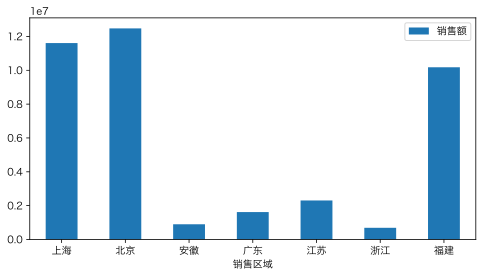

In [99]:
temp = df.pivot_table(index="销售区域", values="销售额", aggfunc="sum")
temp.plot(figsize=(8, 4), kind="bar")
plt.xticks(rotation=0)
plt.show()

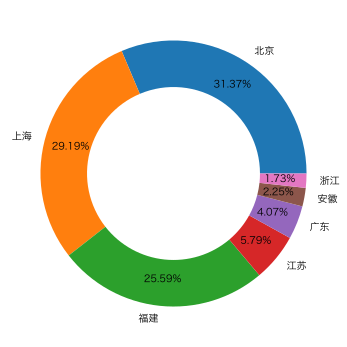

In [100]:
temp.sort_values(by="销售额", ascending=False).plot(
    figsize=(6, 6),
    kind="pie",
    y="销售额",
    ylabel="",
    autopct="%.2f%%",
    pctdistance=0.8,
    wedgeprops=dict(linewidth=1, width=0.35),
    legend=False,
)
plt.show()